In [1]:
import tensorflow as tf
import numpy as np
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


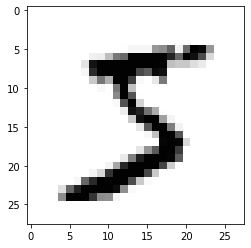

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
from tensorflow.keras.utils import to_categorical
# 데이터 불러오기
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [5]:
X_train.shape,X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import os 
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
______________________________________________

In [8]:
model.compile(
    loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam'
)

In [9]:
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss',patience=10)

In [11]:
history = model.fit(X_train,Y_train,validation_split=0.2,
                    epochs=30,batch_size=200,
                    callbacks=[checkpointer,early_stopping])

Epoch 1/30
240/240 [==============================] - 10s 12ms/step - loss: 0.4741 - accuracy: 0.8655 - val_loss: 0.0718 - val_accuracy: 0.9786

Epoch 00001: val_loss improved from inf to 0.07182, saving model to ./model/best001-0.0718.hdf5
Epoch 2/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0575 - accuracy: 0.9823 - val_loss: 0.0546 - val_accuracy: 0.9840

Epoch 00002: val_loss improved from 0.07182 to 0.05463, saving model to ./model/best002-0.0546.hdf5
Epoch 3/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0443 - val_accuracy: 0.9868

Epoch 00003: val_loss improved from 0.05463 to 0.04430, saving model to ./model/best003-0.0443.hdf5
Epoch 4/30
240/240 [==============================] - 2s 10ms/step - loss: 0.0221 - accuracy: 0.9933 - val_loss: 0.0480 - val_accuracy: 0.9873

Epoch 00004: val_loss did not improve from 0.04430
Epoch 5/30
240/240 [==============================] - 2s 10ms/step - loss: 0

In [13]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best005-0.0404.hdf5')
acc = best_model.evaluate(X_test, Y_test)
print(f"Accuracy: {acc[1]:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9874
Accuracy: 0.9874


In [14]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

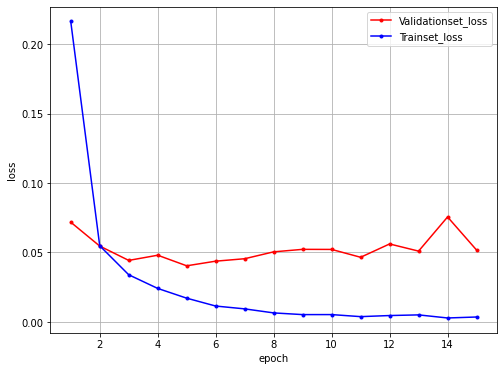

In [15]:
import numpy as np

# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()